In [3]:
import math
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

## Questão 2: 

### Teoria das Filas:

In [4]:
#Condições de Estabilidade:
max=0

for i in range(1,50):
    p = i/(10*(1/0.84))
    if p < 1:
        max=i

print(f"O sistema até {max} requisições está em estabilidade.")

O sistema até 11 requisições está em estabilidade.


In [23]:
results = []

def mmn_metrics(lmbda, mu, n):
    p = lmbda / (n * mu)
    
    if p >= 1:
        raise ValueError("Sistema não estável (p >= 1).")
    
    soma = sum((lmbda/mu)**k / math.factorial(k) for k in range(n))
    parte_n = ((lmbda/mu)**n / math.factorial(n)) * (1 / (1 - p))
    p0 = 1.0 / (soma + parte_n)
    pn = ((lmbda/mu)**n / math.factorial(n)) * (1 / (1 - p)) * p0
    Lq = pn * (p / (1 - p))
    L = Lq + (lmbda / mu)
    Wq = Lq / lmbda
    W = Wq + (1.0 / mu)
    return p, L, Lq, W, Wq

def main():
    try:
        lmbda = float(input("Digite a taxa de chegada (λ): "))
        mu = 1.14
        n = 10
        
        p, L, Lq, W, Wq = mmn_metrics(lmbda, mu, n)
     
        results.append([lmbda, p, L, Lq, W, Wq])
    
    except ValueError as e:
        print("\nErro:", e)

if __name__ == "__main__":
    main()
    
    file_name = "results2.xlsx"
    df = pd.DataFrame(results, columns=["Lambda","p(python)", "L(Python)", "Lq(Python)", "W(Python)", "Wq(Python)"])
    
    if os.path.exists(file_name):
        existing_df = pd.read_excel(file_name)
        final_df = pd.concat([existing_df, df], ignore_index=True)
    else:
        final_df = df
    
    final_df.to_excel(file_name, index=False)

### Plotando os gráficos:

In [20]:
df1 = pd.read_excel("results1.xlsx")
df2 = final_df

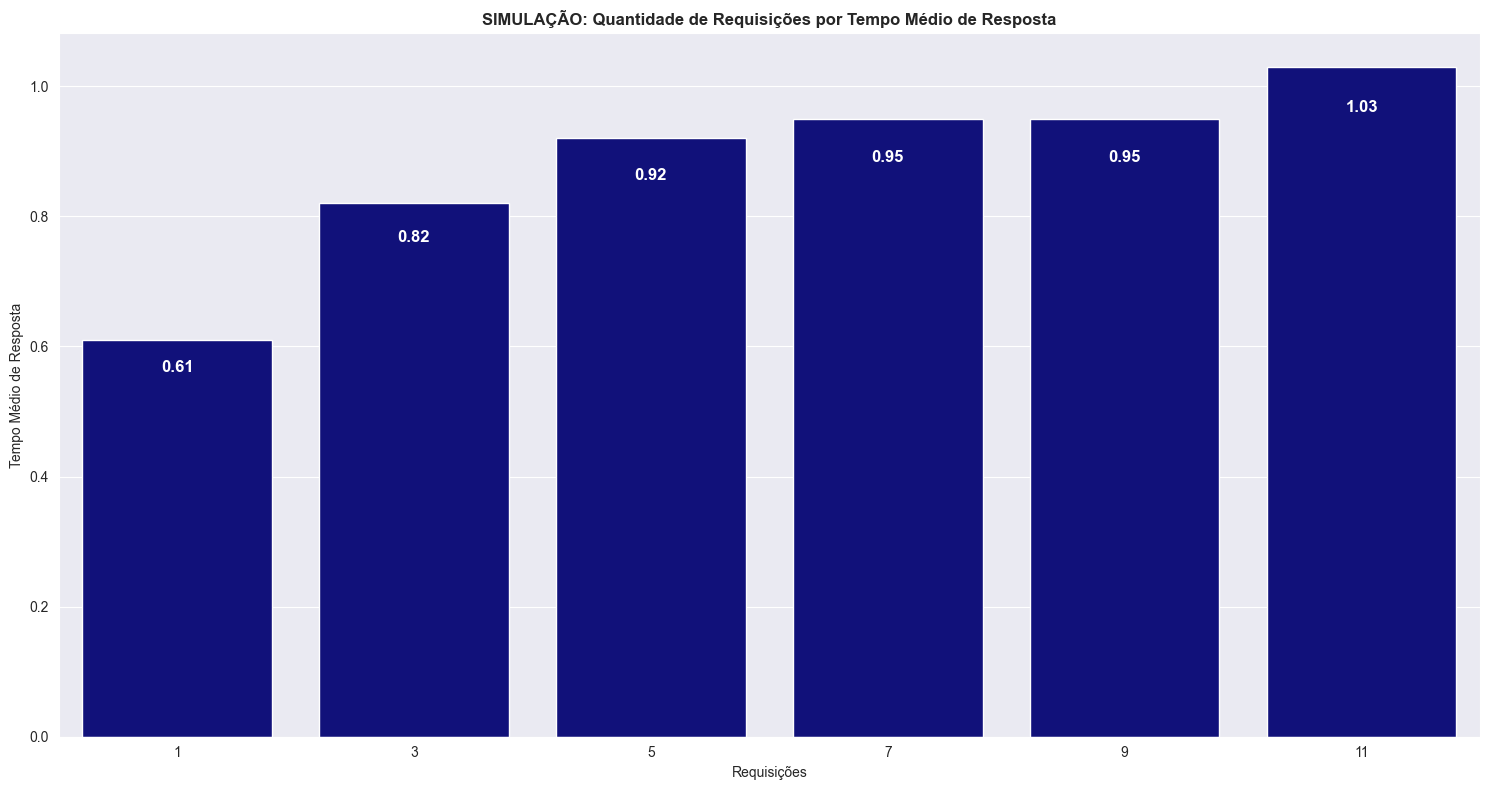

In [21]:
plt.figure(figsize=(15,8))

graf = sns.barplot(df1, x="lambda", y="W",  color="darkblue")

for p in graf.patches:
    graf.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height() - 0.05 * p.get_height()),  
                  ha='center', va='top', fontsize=12, fontweight="bold", color="white")

plt.title("SIMULAÇÃO: Quantidade de Requisições por Tempo Médio de Resposta", fontweight="bold")
plt.xlabel("Requisições")
plt.ylabel("Tempo Médio de Resposta")
plt.tight_layout()
plt.show()

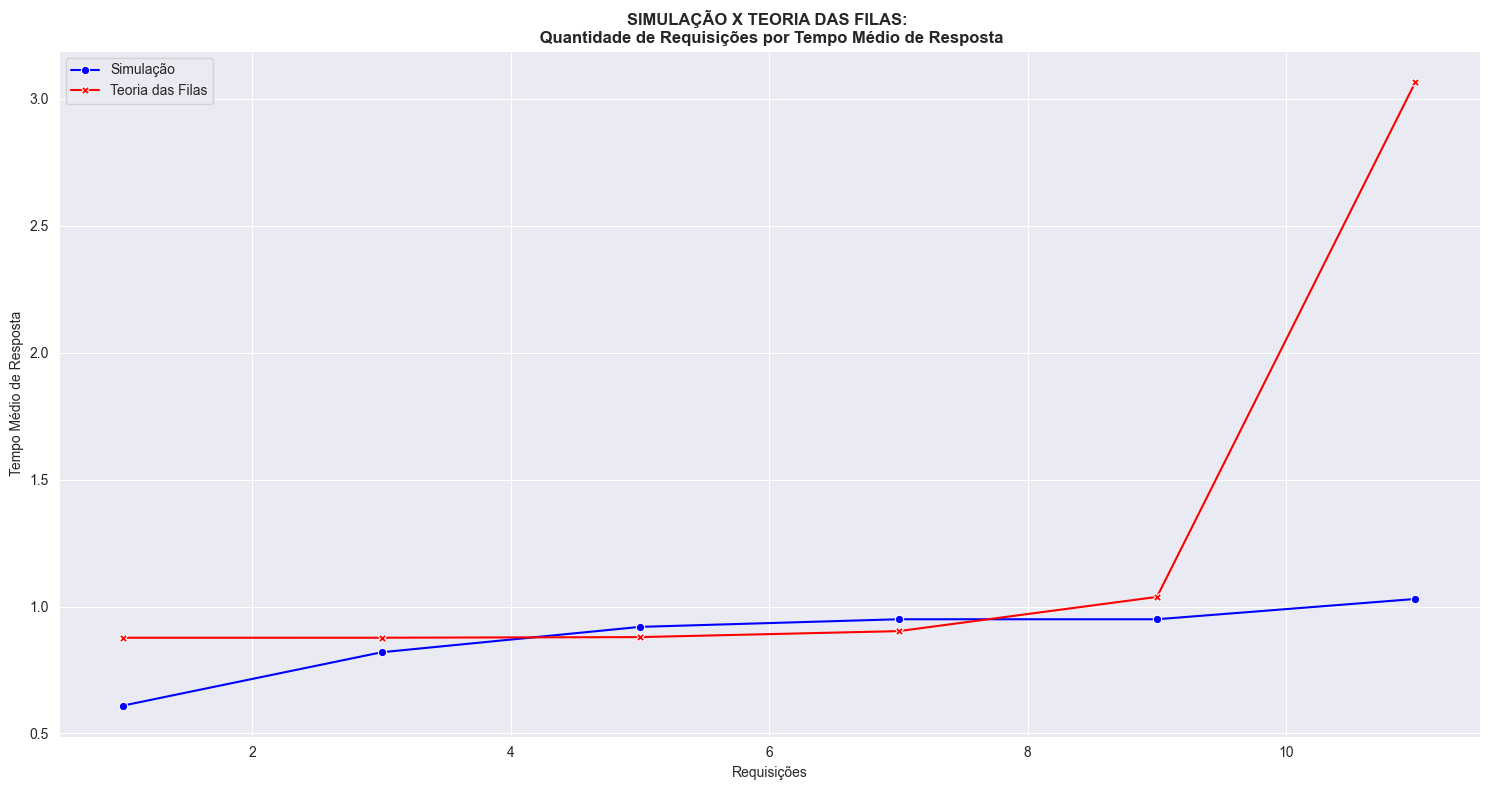

In [22]:
plt.figure(figsize=(15,8))

sns.lineplot(df1, x="lambda", y="W", marker="o", color="blue", label="Simulação")
sns.lineplot(df2, x="Lambda", y="W(Python)", marker="X", color="red", label = "Teoria das Filas")

plt.title("SIMULAÇÃO X TEORIA DAS FILAS: \n Quantidade de Requisições por Tempo Médio de Resposta", fontweight="bold")
plt.xlabel("Requisições")
plt.ylabel("Tempo Médio de Resposta")
plt.tight_layout()
plt.show()

## Questão 3:

### Teoria das Filas

In [24]:
def min_server(lmbda, mu, n):
    p = lmbda / (n * mu)
    
    if p >= 1:
        raise ValueError("Sistema instável (p >= 1).")
    
    soma = sum((lmbda / mu) ** k / math.factorial(k) for k in range(n))
    parte_n = ((lmbda / mu) ** n / math.factorial(n)) * (1 / (1 - p))
    p0 = 1.0 / (soma + parte_n)
    pn = ((lmbda / mu) ** n / math.factorial(n)) * (1 / (1 - p)) * p0
    Lq = pn * (p / (1 - p))
    L = Lq + (lmbda / mu)
    Wq = Lq / lmbda
    W = Wq + (1.0 / mu)
    
    return p, L, Lq, W, Wq


lmbda = 9.4        
mu = 1 / 0.88    

for n in range(1, 50):
    try:
        p, L, Lq, W, Wq = min_server(lmbda, mu, n)
        
        if W < 1:
            print(f"Precisa de no mínimo {n} servidores para que o tempo médio de resposta seja menor que 1 segundo.")
            break
    except ValueError:
        continue

Precisa de no mínimo 11 servidores para que o tempo médio de resposta seja menor que 1 segundo.


In [31]:
results = [] 

def mmn_metrics(lmbda, mu, n):
    p = lmbda / (n * mu)
    if p >= 1:
        raise ValueError("Sistema não estável (p >= 1).")

    soma = sum((lmbda/mu)**k / math.factorial(k) for k in range(n))
    parte_n = ((lmbda/mu)**n / math.factorial(n)) * (1 / (1 - p))
    p0 = 1.0 / (soma + parte_n)
    pn = ((lmbda/mu)**n / math.factorial(n)) * (1 / (1 - p)) * p0
    Lq = pn * (p / (1 - p))
    L = Lq + (lmbda / mu)
    Wq = Lq / lmbda
    W = Wq + (1.0 / mu)
    return p, L, Lq, W, Wq

def main():
    try:
        lmbda = 9.4
        mu = 1.14
        n = int(input("Digite o número de servidores"))
        
        p, L, Lq, W, Wq = mmn_metrics(lmbda, mu, n)
       
        results.append([n, p, L, Lq, W, Wq])
    
    except ValueError as e:
        print("\nErro:", e)

if __name__ == "__main__":
    main()
    
    file_name = "results4.xlsx"
    df = pd.DataFrame(results, columns=["n", "p(python)", "L(Python)", "Lq(Python)", "W(Python)", "Wq(Python)"])
    
    if os.path.exists(file_name):
        existing_df = pd.read_excel(file_name)
        final_df_serv = pd.concat([existing_df, df], ignore_index=True)
        
    else:
        
        final_df_serv = df
    
    final_df_serv.to_excel(file_name, index=False)

### Plotando os Gráficos 

In [32]:
df3 = pd.read_excel("results3.xlsx")
df4 = final_df_serv

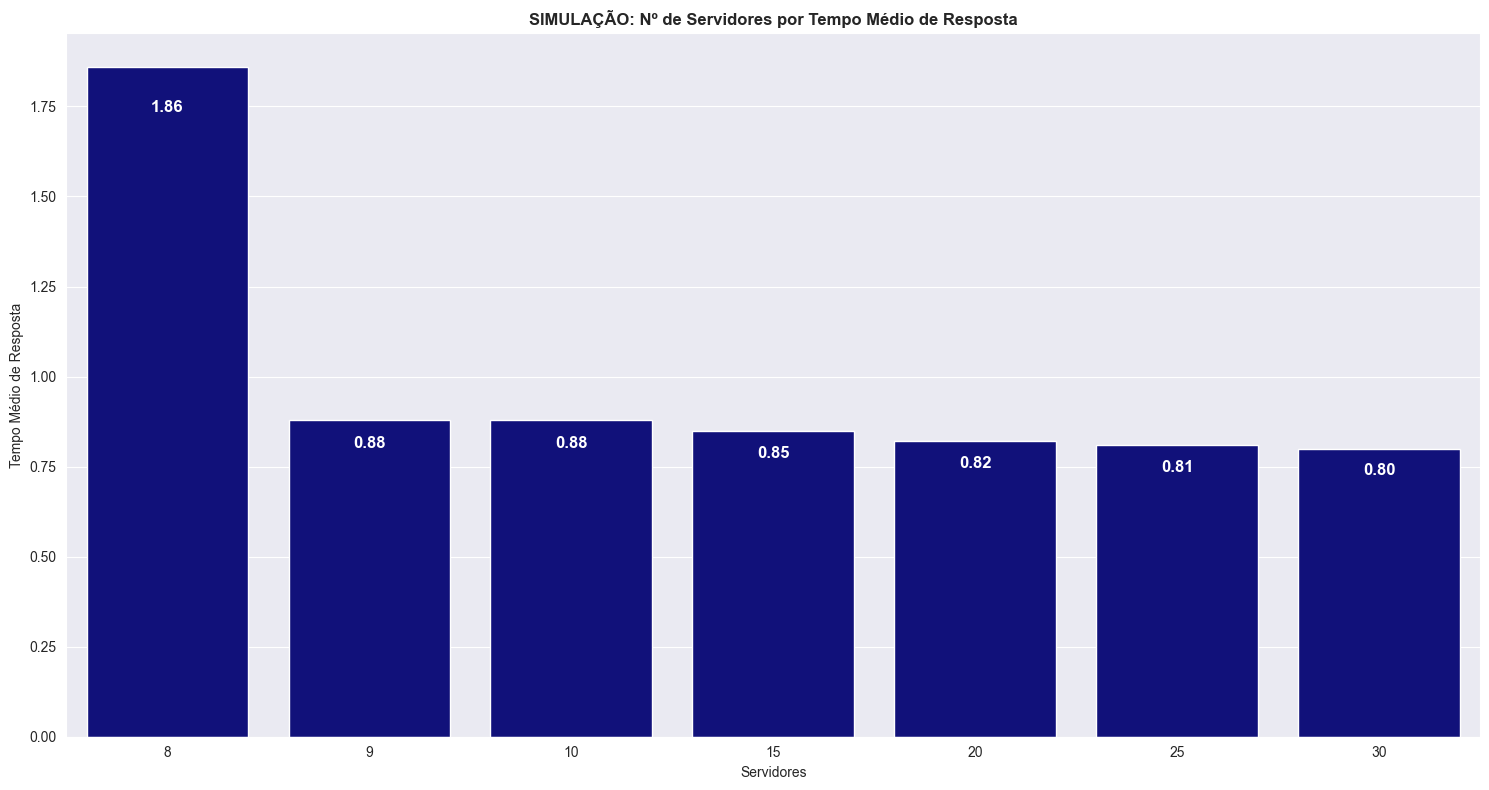

In [33]:
plt.figure(figsize=(15,8))

graf = sns.barplot(df3, x="n", y="W", color="darkblue")

for p in graf.patches:
    graf.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height() - 0.05 * p.get_height()),  
                  ha='center', va='top', fontsize=12, fontweight="bold", color="white")
    
plt.title("SIMULAÇÃO: Nº de Servidores por Tempo Médio de Resposta", fontweight="bold")
plt.xlabel("Servidores")
plt.ylabel("Tempo Médio de Resposta")
plt.tight_layout()
plt.show()

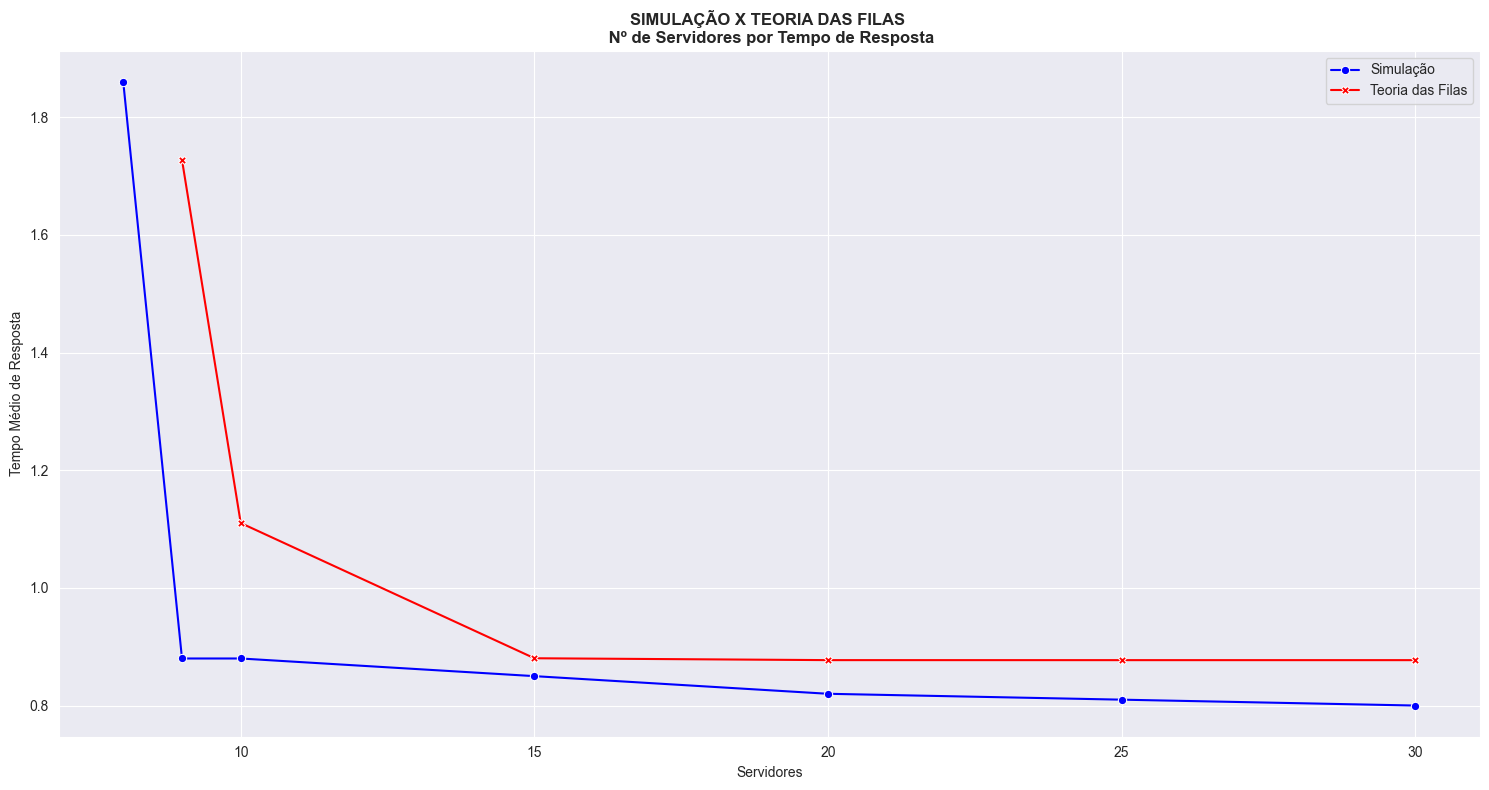

In [34]:
plt.figure(figsize=(15,8))

sns.lineplot(df3, x="n", y="W", marker="o", color="blue", label="Simulação")
sns.lineplot(df4, x="n", y="W(Python)", marker="X", color="red", label="Teoria das Filas")

plt.title("SIMULAÇÃO X TEORIA DAS FILAS \n Nº de Servidores por Tempo de Resposta", fontweight="bold")
plt.xlabel("Servidores")
plt.ylabel("Tempo Médio de Resposta")
plt.tight_layout()
plt.show()